In [1]:
# this file is making spectrogram from wav file
# the input is the wav file
# the output is the spectrogram

# https://blog.csdn.net/qq_38563206/article/details/126486544
# https://blog.csdn.net/sinat_28442665/article/details/84029633
# https://blog.csdn.net/zkw_1998/article/details/118360485
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from tqdm import tqdm
import pandas
import multiprocessing
input_folder = './data_folder/data1/ESC-50/'
output_folder = './data_folder/data1/ESC-50/spec/'
output_folder2 = './data_folder/data1/ESC-50/melspec/'

files = os.listdir(input_folder)
train_dict = pandas.read_csv(input_folder + 'train.csv', index_col=0).to_dict()

# for file in files:
#     filename = file.split('.')[0]
#     x, sr = librosa.load(file, sr=None) 

#     X = librosa.stft(x)
#     Xdb = librosa.amplitude_to_db(abs(X)) 
 
#     fig = plt.Figure()
#     canvas = FigureCanvas(fig)
#     ax = fig.add_subplot(111)
#     p = librosa.display.specshow(Xdb, ax=ax, y_axis='log', x_axis='time')
#     fig.savefig('../'+filename+'/spec_'+filename+'.png')

In [9]:
# get the name and label 
# if the folder is not exist, create the folder
import numpy as np

for i, filename in tqdm(enumerate(train_dict['label'])):
    label = train_dict['label'][filename]
    filetag = filename.split('.')[0].split('/')[1]
    if not os.path.exists(output_folder + label):
        os.makedirs(output_folder + label)
    # make a spectrogram
    x, sr = librosa.load(input_folder + filename, sr=None)
    # X = librosa.stft(x)
    # Xdb = librosa.amplitude_to_db(abs(X)) 

    # fig = plt.Figure()
    # canvas = FigureCanvas(fig)
    # ax = fig.add_subplot(111)
    # p = librosa.display.specshow(Xdb, ax=ax, y_axis='log', x_axis='time')
    # # print(output_folder + label + '/' + filetag + '.png')
    # fig.savefig(output_folder + label + '/' + filetag + '.png')

    outfile_np = output_folder + label + '/' + filetag + '.npy'
    # x, sr = librosa.load(f, sr=None) 
    X = librosa.stft(x)
    np.save(outfile_np, X)
    Xdb = librosa.amplitude_to_db(abs(X)) 

    # fig = plt.Figure()
    # canvas = FigureCanvas(fig)
    # ax = fig.add_subplot(111)
    # p = librosa.display.specshow(Xdb, ax=ax, y_axis='log', x_axis='time')
    # fig.savefig(filename+'spec_'+namelist[n]+'.png')
    plt.figure()
    plt.axis('off')  # no axis
    plt.axes([0., 0., 1., 1.], frameon=False, xticks=[], yticks=[])  # Remove the white edge
    p = librosa.display.specshow(Xdb, y_axis='log')
    plt.savefig(output_folder + label + '/' + filetag + '.jpg', bbox_inches=None, pad_inches=0)
    plt.close()

1104it [04:37,  3.98it/s]


Vacuum cleaner


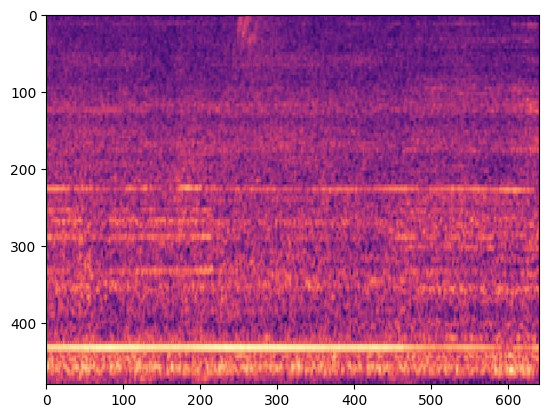

In [47]:
# show and play the spectrogram and audio given the name
# for AP_data_folder_data_ESC50
from playsound import playsound
def play_and_show(name):
    
    audio_path = './data_folder/data1/ESC-50/audio/' + name + '.wav'
    pd_train = pandas.read_csv('./data_folder/data1/ESC-50/train.csv')
    for td in pd_train.iterrows():
        if name in td[1]['fname']:
            label = td[1]['label']
            print(label)
    spec_path = './data_folder/data1/ESC-50/melspec/' + label + '/' + name + '.jpg'
    plt.imshow(plt.imread(spec_path))
    plt.show()
    playsound(audio_path)

play_and_show('1-19872-A-36')

In [8]:
# get the name and label make mel spec
# if the folder is not exist, create the folder
import numpy as np
import librosa
for i, filename in tqdm(enumerate(train_dict['label'])):
    label = train_dict['label'][filename]
    filetag = filename.split('.')[0].split('/')[1]
    if not os.path.exists(output_folder2 + label):
        os.makedirs(output_folder2 + label)
    # make a spectrogram
    y, sr = librosa.load(input_folder + filename, sr=None)

    outfile_np = output_folder2 + label + '/' + filetag + '.npy'
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8196)
    np.save(outfile_np, S)

    S_dB = librosa.power_to_db(S, ref=np.max)

    plt.figure()
    plt.axis('off')  # no axis
    plt.axes([0., 0., 1., 1.], frameon=False, xticks=[], yticks=[])  # Remove the white edge
    p = librosa.display.specshow(S_dB)
    plt.savefig(output_folder2 + label + '/' + filetag + '.jpg', bbox_inches=None, pad_inches=0)
    plt.close()

1104it [01:42, 10.76it/s]


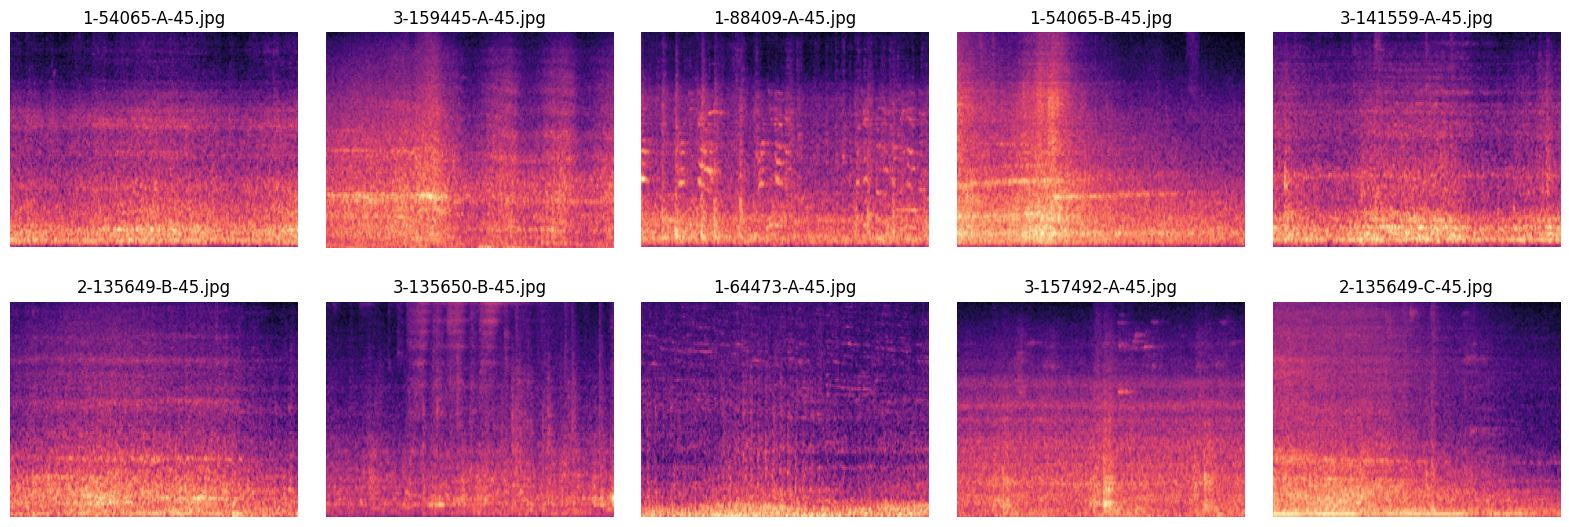

Train


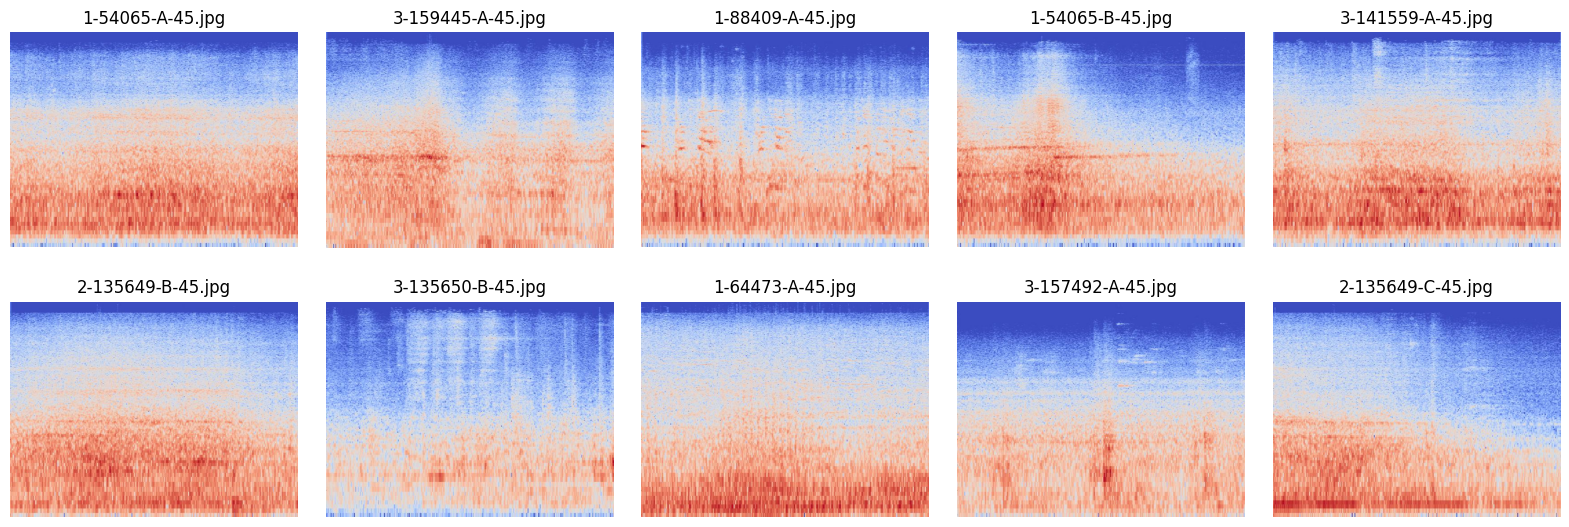

In [70]:
# show some mel spec with the same label
import random
# show 10 random mel spec
file_folder = []
label = 'Train'
# plot mel spec
mel_spec_folder = output_folder2 + label + '/'
files = os.listdir(mel_spec_folder)
for file in files:
    if file.endswith('.jpg'):
        file_folder.append(file)
random.shuffle(file_folder)
file_folder = file_folder[:10]
fig = plt.figure(figsize=(20, 7))
for i in range(10):
    img = plt.imread(mel_spec_folder + file_folder[i])
    ax = fig.add_subplot(2, 5, i+1)
    ax.set_title(file_folder[i])
    plt.subplots_adjust(wspace=0.1, hspace=0)
    plt.imshow(img)
    plt.axis('off')
plt.show()
print(label)

# plot regular spec
fig = plt.figure(figsize=(20, 7))
spec_folder = output_folder + label + '/'
for i in range(10):
    img = plt.imread(spec_folder + file_folder[i])
    ax = fig.add_subplot(2, 5, i+1)
    ax.set_title(file_folder[i])
    plt.subplots_adjust(wspace=0.1, hspace=0)
    plt.imshow(img)
    plt.axis('off')
plt.show()
fig.savefig('spec_mel_spec.png')
# use subplot to show the image


In [ ]:
# show some mel spec with the same label
import random
# show 10 random mel spec
# plot mel spec
mel_spec_folder = output_folder2
spec_folder = output_folder
labels = os.listdir(mel_spec_folder)
outfolder = './data_folder/data1/ESC-50/compare_spec/'
if not os.path.exists(outfolder):
    os.makedirs(outfolder)
for label in labels:
    file_folder = []
    if not os.path.exists(outfolder+label):
        os.makedirs(outfolder+label)
    files = os.listdir(mel_spec_folder + label + '/')
    for file in files:
        if file.endswith('.jpg'):
            file_folder.append(file)
    random.shuffle(file_folder)
    file_folder = file_folder[:10]
    fig = plt.figure(figsize=(20, 7))
    for i in range(len(file_folder)):
        img = plt.imread(mel_spec_folder + label + '/' + file_folder[i])
        ax = fig.add_subplot(2, 5, i+1)
        ax.set_title(file_folder[i])
        plt.subplots_adjust(wspace=0.1, hspace=0)
        plt.imshow(img)
        plt.axis('off')
    print(label)
    plt.show()
    fig.savefig(outfolder+label+'/'+'mel.jpg', bbox_inches='tight')
    plt.close()

    # plot regular spec
    fig = plt.figure(figsize=(20, 7))
    for i in range(len(file_folder)):
        img = plt.imread(spec_folder + label + '/' + file_folder[i])
        ax = fig.add_subplot(2, 5, i+1)
        ax.set_title(file_folder[i])
        plt.subplots_adjust(wspace=0.1, hspace=0)
        plt.imshow(img)
        plt.axis('off')
    plt.show()
    fig.savefig(outfolder+label+'/'+'spec.jpg', bbox_inches='tight')
    plt.close()





In [6]:
# show some mel spec with the same label
import random
import numpy as np
import librosa
import os
from tqdm import tqdm
# show 10 random mel spec
# plot mel spec

inputpath = '/home/tonypeng/Workspace1/Hearing/SemanticHearing/data/BinauralCuratedDataset/FSD50K/FSD50K.dev_audio/'
outputpath_spec = './data_folder/mix_data_1/spec/'
outputpath_npy = './data_folder/mix_data_1/npy/'
outputpath2_npy = './data_folder/mix_data_1/npy_log/'
files = os.listdir(inputpath)
for file in tqdm(files):
    # make a spectrogram
    filename = file.split('.')[0]
    outfile_np = outputpath_npy + filename + '.npy'
    outfile2_np = outputpath2_npy + filename + '.npy'
    if os.path.exists(outfile_np) and os.path.exists(outfile2_np):
        continue
    y, sr = librosa.load(inputpath + file, sr=None)
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8196)
    np.save(outfile_np, S)

    S_dB = librosa.power_to_db(S, ref=np.max)
    np.save(outfile2_np, S_dB)

    # plt.figure()
    # plt.axis('off')  # no axis
    # plt.axes([0., 0., 1., 1.], frameon=False, xticks=[], yticks=[])  # Remove the white edge
    # p = librosa.display.specshow(S_dB)
    # plt.savefig(output_folder2 + label + '/' + filetag + '.jpg', bbox_inches=None, pad_inches=0)
    # plt.close()

  0%|          | 0/40966 [00:00<?, ?it/s]

100%|██████████| 40966/40966 [18:50<00:00, 36.24it/s]


In [5]:
# show some mel spec with the same label
import random
import numpy as np
import librosa
import os
from tqdm import tqdm
# show 10 random mel spec
# plot mel spec
inputpath = './data_folder/mix_data_1/'
outputpath_spec = './data_folder/mix_data_1/spec/'
outputpath_npy = './data_folder/mix_data_1/npy/'
outputpath2_npy = './data_folder/mix_data_1/npy_log/'
train_test_val = ['train', 'test', 'val']
for ttv in train_test_val:
    files = os.listdir(inputpath + ttv + '/')
    outputpath_npy_ttv = outputpath_npy + ttv + '/'
    outputpath2_npy_ttv = outputpath2_npy + ttv + '/'
    for file in tqdm(files):
        # make a spectrogram
        filename = file.split('.')[0]
        outfile_np = outputpath_npy_ttv + filename + '.npy'
        outfile2_np = outputpath2_npy_ttv + filename + '.npy'
        if os.path.exists(outfile_np) and os.path.exists(outfile2_np):
            continue
        y, sr = librosa.load(inputpath + ttv + '/' + file, sr=None)

        S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8196)
        np.save(outfile_np, S)

        
        S_dB = librosa.power_to_db(S, ref=np.max)
        np.save(outfile2_np, S_dB)

100%|██████████| 2000/2000 [01:12<00:00, 27.59it/s]
